<a href="https://colab.research.google.com/github/shivabioinformatics/AI-ML-in-Space-Biology-NASA-TOPS-T-ScienceCore-/blob/main/module2(clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Determining Whether Astronaut Samples and Ground Control Counterparts Have Distinct Gene Expression Profiles Using Unsupervised Learning


# Read in the methods


In [ ]:
# install and import the python module for importing a notebook
!pip install import_ipynb
import import_ipynb


# mount your google drive to this notebook
from google.colab import drive
drive.flush_and_unmount()
drive.mount("mnt", force_remount=True)


# import the "Copy of methods.ipynb" from your google drive into this notebook (this will take a while -- mabye 5 minutes?)
m = __import__("mnt/MyDrive/Colab Notebooks/Copy of methods")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.7 MB/s eta 0:00:00
Drive not mounted, so nothing to flush and unmount.
Mounted at mnt
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 167.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 126.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 153.2 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=35a1a14c02ddcac08f27bb82f69f6e6feb36549c29c38ee0f9815a97fd019559
  Stored in directory: /tmp/pip-ephem-wheel-cache-gg75ipjf/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info
   ━━━━━━━━━━━━━━

# read in data and metadata


# read in data and metadata

The data that we will be using is [normalized](https://en.wikipedia.org/wiki/Normalization_(statistics)) RNA-seq data which was generated from retinal tissue.  The counts of genes per sample are represented in a table and have been normalized, which means they've been changed to account for differences in how the RNA-seq experiment played out.  For example, some transcripts may have been copied multiple times in the experiment (called [sequencing depth](https://www.biostars.org/p/282708/)) while others may not have been as deeply copied.  Moreover, because some genes are much longer than others, longer genes will have more transcript fragments and appear to be more highly expressed than shorter genes.  These differences will change the results of our analysis because we are looking for differences in gene expression (i.e. counts) between genes and between samples.
 Normalization is a statistical process of correcting for these differences, and there are many methods available.  The goal of normalization is to make the gene expression profiles more comparable across samples, allowing for accurate comparisons and statistical analysis.

In [ ]:
# read in the RNA-seq data from OSD-255
data=dict()
metadata=dict()
data['255-normalized'] = m.read_rnaseq_data('255_rna_seq_Normalized_Counts')
metadata['255'] = m.read_meta_data('255')



# display the dimensions of the RNA-seq data set and the associated metadata
print('data shape: ', data['255-normalized'].shape)
print('metadata shape: ', metadata['255'].shape)





data shape:  (23419, 17)
metadata shape:  (16, 72)


# Use the K-means algorithm to cluster the RNA-seq data

## cluster using original unfiltered data

In [ ]:
# make a copy of the original rna-seq dataframe
df = data['255-normalized']

sample:  GSM3932693 , cluster:  [0] Ground Control
sample:  GSM3932694 , cluster:  [0] Ground Control
sample:  GSM3932695 , cluster:  [0] Ground Control
sample:  GSM3932696 , cluster:  [0] Ground Control
sample:  GSM3932697 , cluster:  [1] Ground Control
sample:  GSM3932698 , cluster:  [0] Ground Control
sample:  GSM3932699 , cluster:  [0] Ground Control
sample:  GSM3932700 , cluster:  [0] Ground Control
sample:  GSM3932701 , cluster:  [1] Space Flight
sample:  GSM3932702 , cluster:  [1] Space Flight
sample:  GSM3932703 , cluster:  [1] Space Flight
sample:  GSM3932704 , cluster:  [1] Space Flight
sample:  GSM3932705 , cluster:  [0] Space Flight
sample:  GSM3932706 , cluster:  [0] Space Flight
sample:  GSM3932707 , cluster:  [1] Space Flight
sample:  GSM3932708 , cluster:  [0] Space Flight


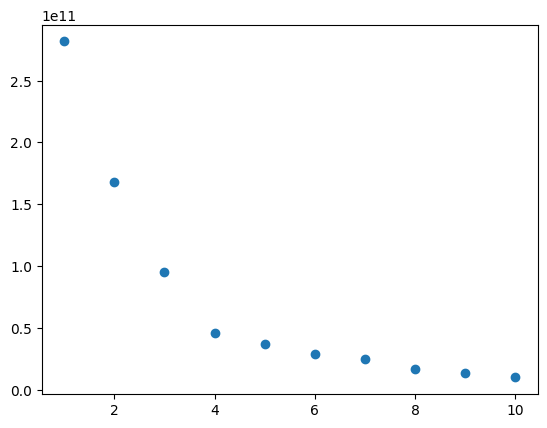

In [ ]:
# run the my_kmeans method with k=2
m.my_kmeans(df, metadata['255'], k=2)

# find ideal value of k in k-means for this data
m.find_k_elbow(df)

In [ ]:
# run the my_kmeans method with k=3
m.my_kmeans(df, metadata['255'], k=3)


sample:  GSM3932693 , cluster:  [0] Ground Control
sample:  GSM3932694 , cluster:  [0] Ground Control
sample:  GSM3932695 , cluster:  [0] Ground Control
sample:  GSM3932696 , cluster:  [0] Ground Control
sample:  GSM3932697 , cluster:  [1] Ground Control
sample:  GSM3932698 , cluster:  [0] Ground Control
sample:  GSM3932699 , cluster:  [0] Ground Control
sample:  GSM3932700 , cluster:  [0] Ground Control
sample:  GSM3932701 , cluster:  [1] Space Flight
sample:  GSM3932702 , cluster:  [1] Space Flight
sample:  GSM3932703 , cluster:  [1] Space Flight
sample:  GSM3932704 , cluster:  [1] Space Flight
sample:  GSM3932705 , cluster:  [2] Space Flight
sample:  GSM3932706 , cluster:  [0] Space Flight
sample:  GSM3932707 , cluster:  [1] Space Flight
sample:  GSM3932708 , cluster:  [0] Space Flight


before filter:  (19583, 17)
after filter:  (19583, 17)


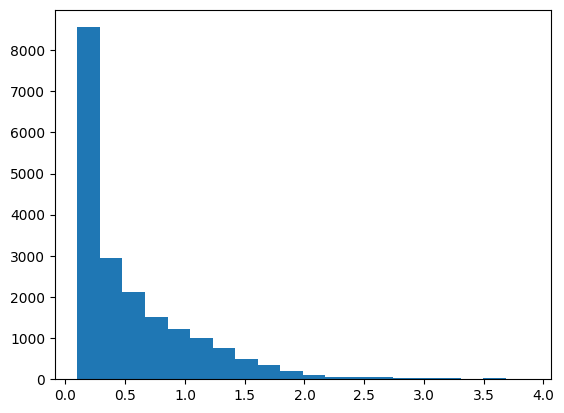

In [ ]:
# filter out nans and remove genes with CV < 0.1
print('before filter: ', df.shape)
df = m.filter_data(df, dropnans=True, dropgenes=None, droplowcvs=0.1)
print('after filter: ', df.shape)

Low CV (<0.1) means low variability, indicating that the gene expression is nearly constant across samples. cv = Standard Deviation/mean

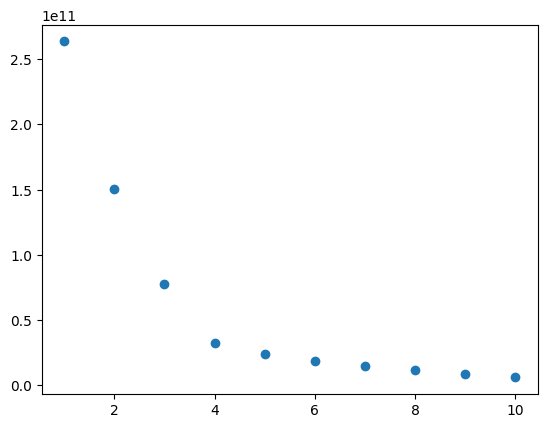

In [ ]:
# find ideal value of k in k-means for this data
m.find_k_elbow(df)

In [3]:
# run the my_kmeans method with k=4
#m.my_kmeans(df, metadata['255'], k=4)

## cluster using DGEA-filtered data


The function m.filter_by_dgea filters genes based on ***Differential Gene Expression Analysis (DGEA)***, criteria, retaining only genes that show statistically significant differences between ground control and spaceflight samples.

In [1]:
#df = m.filter_by_dgea(data['255-normalized'], metadata['255'],  pval=0.05, l2fc=0)

In [ ]:
# run the my_kmeans method with k=2
m.my_kmeans(df, metadata['255'], k=2)

sample:  GSM3932693 , cluster:  [0] Ground Control
sample:  GSM3932694 , cluster:  [0] Ground Control
sample:  GSM3932695 , cluster:  [0] Ground Control
sample:  GSM3932696 , cluster:  [0] Ground Control
sample:  GSM3932697 , cluster:  [1] Ground Control
sample:  GSM3932698 , cluster:  [0] Ground Control
sample:  GSM3932699 , cluster:  [0] Ground Control
sample:  GSM3932700 , cluster:  [0] Ground Control
sample:  GSM3932701 , cluster:  [1] Space Flight
sample:  GSM3932702 , cluster:  [1] Space Flight
sample:  GSM3932703 , cluster:  [1] Space Flight
sample:  GSM3932704 , cluster:  [1] Space Flight
sample:  GSM3932705 , cluster:  [0] Space Flight
sample:  GSM3932706 , cluster:  [0] Space Flight
sample:  GSM3932707 , cluster:  [1] Space Flight
sample:  GSM3932708 , cluster:  [0] Space Flight


### Use PCA to cluster and plot the RNA-seq data
